
>**22MCA0394**

> **ASHISH PATEL**

>**MACHINE LEARNING**

> **DIGITAL ASSIGNMENT 2**

---



**2) Design fully connected neural network for classifying penguin species using penguin
species dataset. Dataset: https://www.kaggle.com/datasets/parulpandey/palmer-archipelagoantarctica-penguin-data . Note: Accuracy should be greater than 0.85 and loss should be less than 0.2**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Load the penguin species dataset
data = pd.read_csv("/content/penguins_size.csv")
data.info()
print("=="*40)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
6,Adelie,Torgersen,39.2,19.6,195,4675,MALE
7,Adelie,Torgersen,41.1,17.6,182,3200,FEMALE
8,Adelie,Torgersen,38.6,21.2,191,3800,MALE
9,Adelie,Torgersen,34.6,21.1,198,4400,MALE


In [ ]:
# Encode categorical features to numerical values
labelencoder = LabelEncoder()
data.island = labelencoder.fit_transform(data.island)
data.species = labelencoder.fit_transform(data.species)
data.sex = labelencoder.fit_transform(data.sex)
data.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181,3750,1
1,0,2,39.5,17.4,186,3800,0
2,0,2,40.3,18.0,195,3250,0
3,0,2,36.7,19.3,193,3450,0
4,0,2,39.3,20.6,190,3650,1
5,0,2,38.9,17.8,181,3625,0
6,0,2,39.2,19.6,195,4675,1
7,0,2,41.1,17.6,182,3200,0
8,0,2,38.6,21.2,191,3800,1
9,0,2,34.6,21.1,198,4400,1


In [ ]:
# Separate features and target variable
X = data.drop(columns=['species'])
y = data['species']

In [ ]:
# Standardize the features (mean = 0, standard deviation = 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encode the target variable
y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Created the neural network model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output units for 3 penguin species

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                112       
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 755
Trainable params: 755
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
9/9 [==============================] - 1s 44ms/step - loss: 1.1181 - accuracy: 0.2556 - val_loss: 1.0420 - val_accuracy: 0.3731
Epoch 2/12
9/9 [==============================] - 0s 11ms/step - loss: 0.9787 - accuracy: 0.6391 - val_loss: 0.9088 - val_accuracy: 0.8358
Epoch 3/12
9/9 [==============================] - 0s 9ms/step - loss: 0.8569 - accuracy: 0.8684 - val_loss: 0.7947 - val_accuracy: 0.8955
Epoch 4/12
9/9 [==============================] - 0s 11ms/step - loss: 0.7502 - accuracy: 0.8647 - val_loss: 0.6936 - val_accuracy: 0.8657
Epoch 5/12
9/9 [==============================] - 0s 11ms/step - loss: 0.6545 - accuracy: 0.8534 - val_loss: 0.5994 - val_accuracy: 0.8806
Epoch 6/12
9/9 [==============================] - 0s 17ms/step - loss: 0.5663 - accuracy: 0.8759 - val_loss: 0.5135 - val_accuracy: 0.8955
Epoch 7/12
9/9 [==============================] - 0s 10ms/step - loss: 0.4857 - accuracy: 0.8910 - val_loss: 0.4367 - val_accuracy: 0.9254
Epoch 8/12
9/9 [============

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.2028 - accuracy: 0.9851


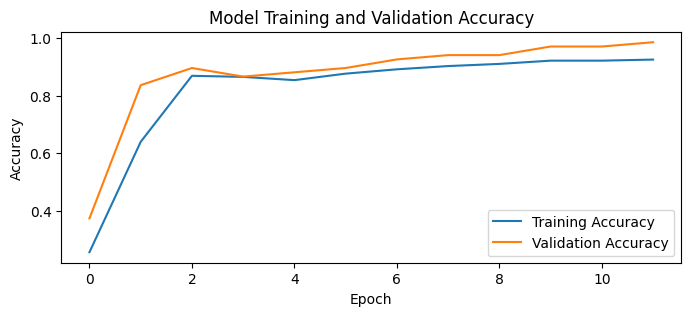

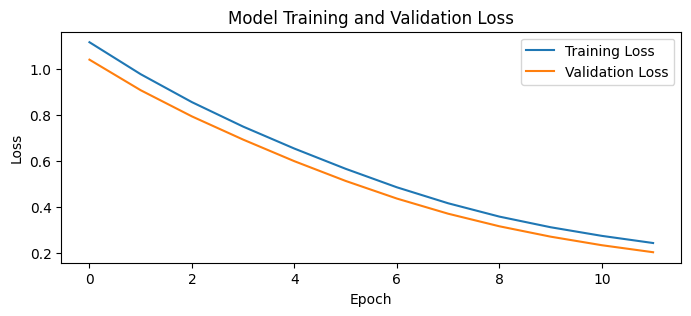

In [ ]:
# Evaluate the model
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8,3))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()